In [1]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from itertools import product

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('D:\BITS PILANI\Applied Statistical Methods\Assignment - 2\weeklydata.csv')

In [3]:
data.head()

,Unnamed: 0,GHI,Week
0,0,29441,0
1,0,28901,1
2,0,30891,2
3,0,32735,3
4,0,32489,4


In [4]:
#data = data[['Year', 'Month', 'Day', 'Hour',	'DHI',	'DNI',	'GHI',	'Clearsky DHI',	'Clearsky DNI',	'Clearsky GHI',	'Dew Point',	'Temperature',	'Pressure',	'Relative Humidity',	'Solar Zenith Angle',	'Wind Speed']]
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,GHI,Week
0,29441,0
1,28901,1
2,30891,2
3,32735,3
4,32489,4


In [5]:
data.shape

(782, 2)

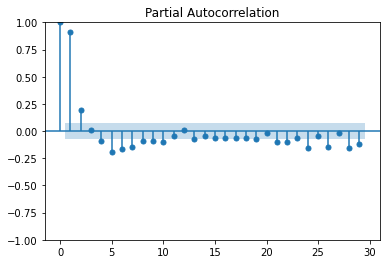

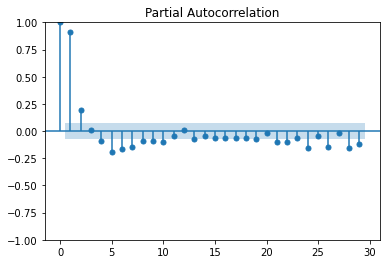

In [6]:
plot_pacf(data['GHI'])

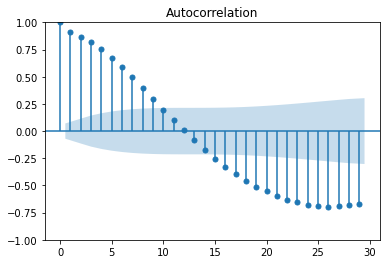

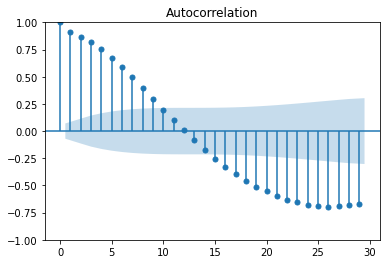

In [7]:
plot_acf(data['GHI'])

In [8]:
ad_fuller_result = adfuller(data['GHI'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -9.489838688135503
p-value: 3.677932467118182e-16


In [9]:
#data['GHI'] = np.log(data['GHI'])
data['GHI'] = data['GHI'].diff()
data = data.drop(data.index[0])
#data.drop(columns=['Column1', 'Unnamed: 17', 'Unnamed: 18'])
data.reset_index(inplace=True)

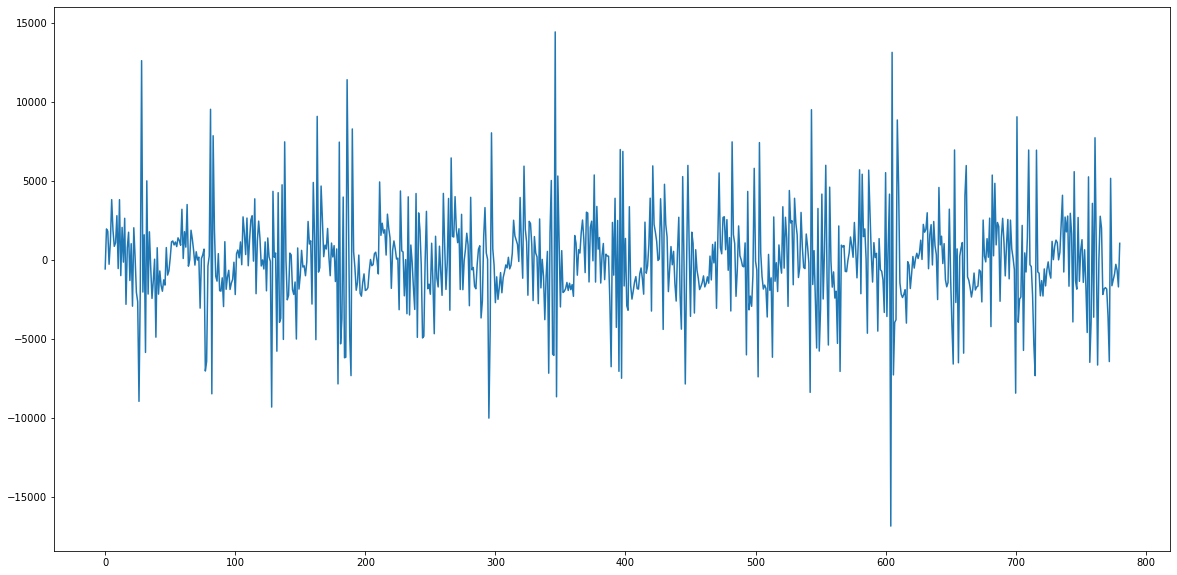

In [10]:
plt.figure(figsize=[20,10]); # Set dimensions for figure
plt.plot(data['GHI'])
plt.show()

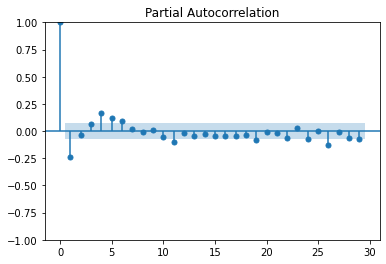

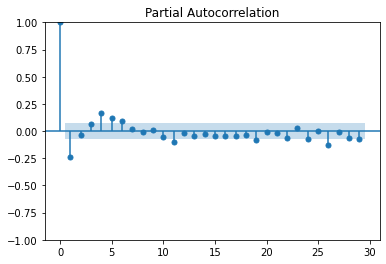

In [11]:
plot_pacf(data['GHI'])

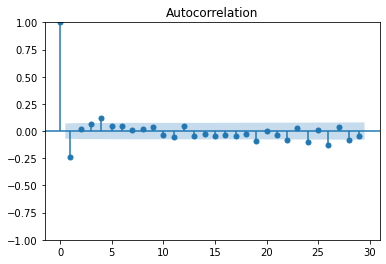

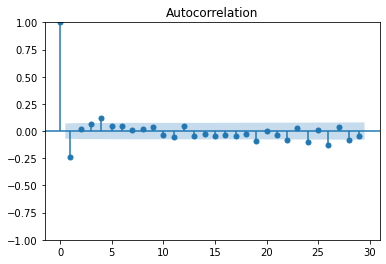

In [12]:
plot_acf(data['GHI'])

In [13]:
def optimize_ARIMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, d, q) tuples
        exog - the exogenous variable
    """
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(exog, order=order).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [42]:
ps = range(0, 15, 1)
d = 0
qs = 0

# Create a list with all possible combination of parameters
parameters = ps
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    #each = list(each)
    each.append(1)
    each = tuple(each)
    order_list.append(each)
    
result_df = optimize_ARIMA(order_list, exog=data['GHI'])

result_df


AttributeError: 'int' object has no attribute 'append'

In [27]:
best_model = SARIMAX(data['GHI'], order=(6,0,0)).fit()
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:                    GHI   No. Observations:                  781
Model:               SARIMAX(6, 0, 0)   Log Likelihood               -7346.407
Date:                Mon, 12 Dec 2022   AIC                          14706.814
Time:                        22:30:58   BIC                          14739.438
Sample:                             0   HQIC                         14719.361
                                - 781                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2886      0.025    -11.371      0.000      -0.338      -0.239
ar.L2         -0.0480      0.030     -1.581      0.114      -0.108       0.012
ar.L3          0.0971      0.032      3.032      0.0

In [28]:
prediction = best_model.predict(start=0, end=1200)
prediction1 = best_model.predict(start=0, end=780)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

print('MAE =', round(mean_absolute_error(data['GHI'], prediction1), ndigits=3))
print('MAPE =', round(mean_absolute_percentage_error(data['GHI'], prediction1), ndigits=3))
print('MSE =', round(mean_squared_error(data['GHI'], prediction1), ndigits=3))

MAE = 2137.136
MAPE = 3.572
MSE = 8663585.29


In [30]:
diff = prediction1 - data['GHI']
diff

0       540.000000
1     -1860.061359
2     -2320.559093
3      -287.141815
4     -1021.741593
          ...     
776    -131.791451
777     156.050593
778     505.806420
779    1772.150656
780   -1085.616136
Length: 781, dtype: float64

<AxesSubplot:>

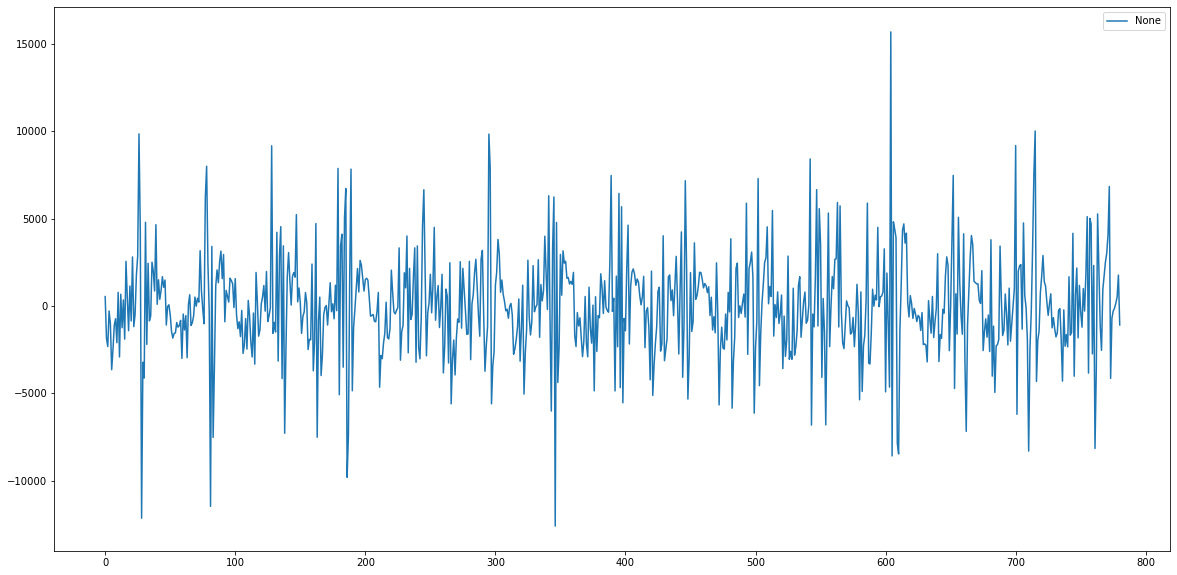

In [31]:
diff.plot(figsize=(20,10),legend=True)
#plt.xticks(ticks=list(np.arange(0,140000,20000)), labels=list(np.arange(0,140000,20000)))

In [32]:
print(prediction1.mean())
print(data['GHI'].mean())

1.7561452718605794
-1.9577464788732395


([<matplotlib.axis.XTick at 0x2874365b0d0>,
 [Text(0, 0, '0'),
  Text(100, 0, '100'),
  Text(200, 0, '200'),
  Text(300, 0, '300'),
  Text(400, 0, '400'),
  Text(500, 0, '500'),
  Text(600, 0, '600'),
  Text(700, 0, '700'),
  Text(800, 0, '800'),
  Text(900, 0, '900'),
  Text(1000, 0, '1000'),
  Text(1100, 0, '1100'),
  Text(1200, 0, '1200')])

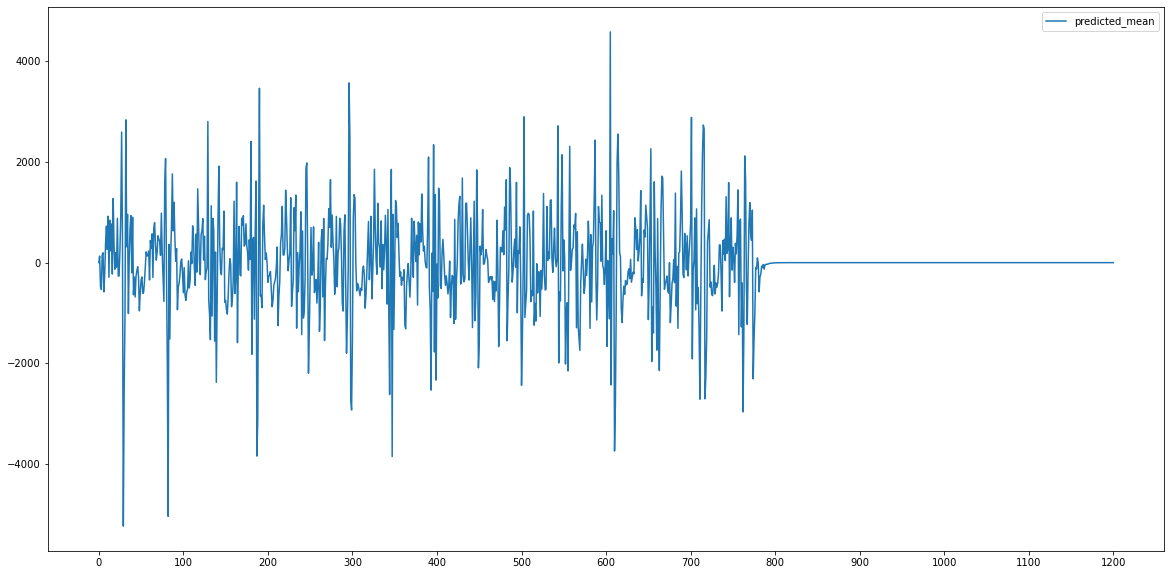

In [33]:
prediction.plot(figsize=(20,10), legend=True)

plt.xticks(ticks=list(np.arange(0,1250,100)), labels=list(np.arange(0,1250,100)))

<AxesSubplot:>

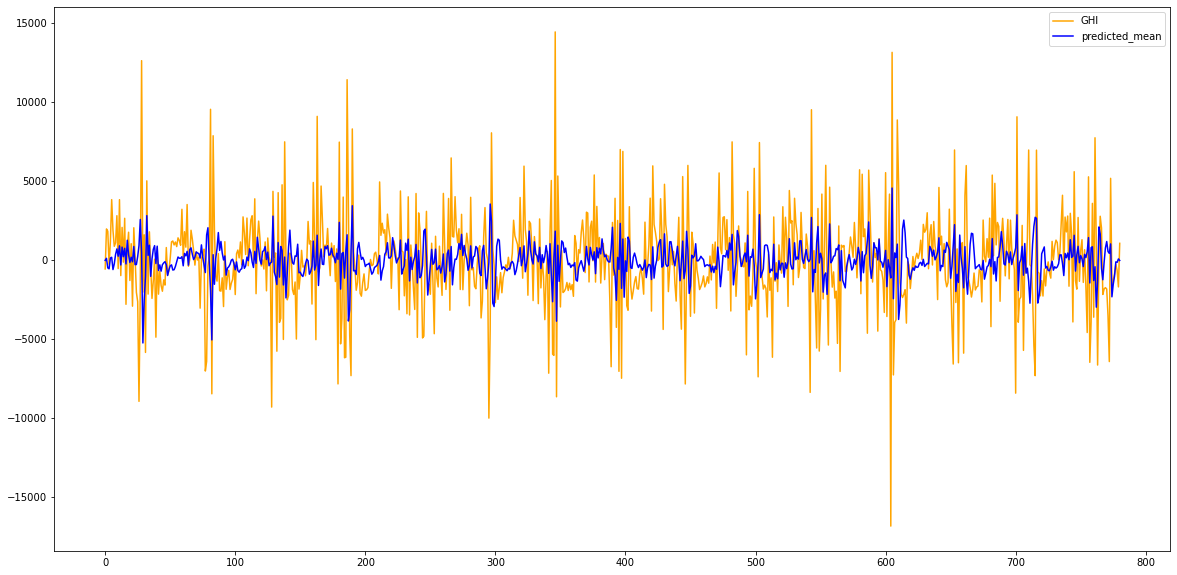

In [34]:
data['GHI'].plot(figsize=(20,10), legend=True, color='orange')
prediction1.plot(legend=True, color='blue')

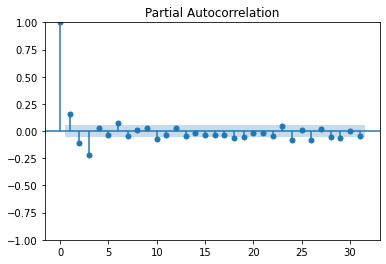

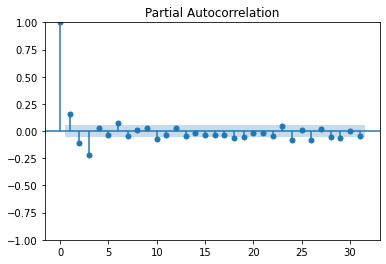

In [35]:
plot_pacf(prediction)

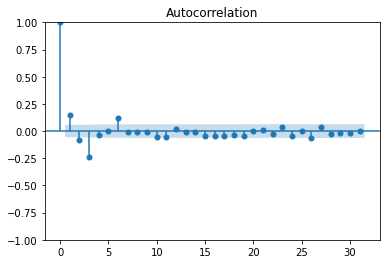

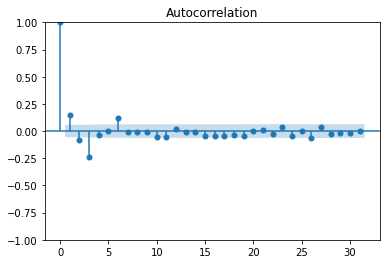

In [36]:
plot_acf(prediction)

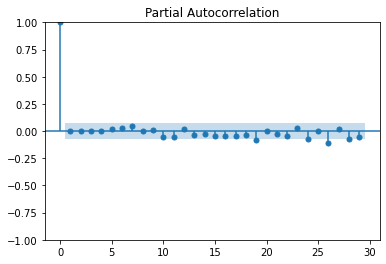

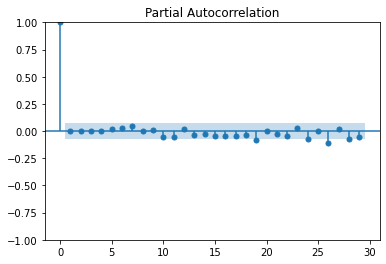

In [37]:
plot_pacf(diff)

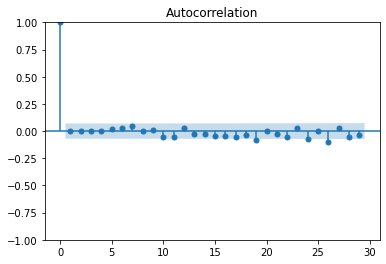

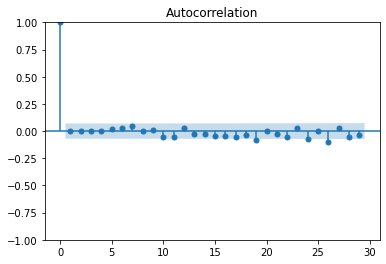

In [38]:
plot_acf(diff)